The use case is to analyse the attrition using HR analytics based on data given. It is a classification problem as the target variable attrition is either yes or no

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import scipy
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [266]:
#Lets read the csv file
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [267]:
#now lets convert the csv files to a DataFrame
HR_Analytics=pd.DataFrame(data=df)
HR_Analytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [268]:
HR_Analytics.columns
#This is done inorder to list the number of columnns present in the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [269]:
HR_Analytics.shape
#The dataset has 1470 rows and 35 columns

(1470, 35)

In [270]:
HR_Analytics.dtypes
#There are some object types attributes while most of them are integer type attributes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [271]:
#lets see if there are missing values or not
HR_Analytics.isnull().sum()
#there seems to be no missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

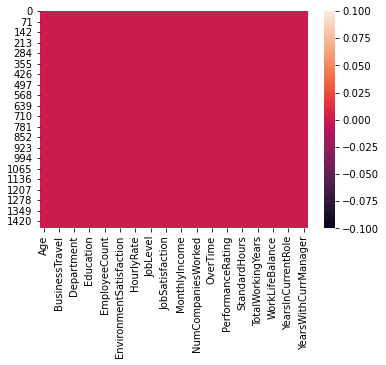

In [272]:
# lets confirm by heatmap if missing values are present or not
sns.heatmap(HR_Analytics.isnull())
#Hennce the results are confirmed that no missing values are present

Lets use label encoder to convert objects to numeric values
the following columns are objects: 1)Attrition,2)BusinessTravel,3)Department,4)EducationField,5)Gender,6)JobRole,7)MaritalStatus,8)Over18,9)Overtime

In [273]:
le1=LabelEncoder()
HR_Analytics["Attrition"]=le1.fit_transform(HR_Analytics["Attrition"])
print(HR_Analytics["Attrition"])
print(HR_Analytics["Attrition"].value_counts())
#Yes corresponds to 1 and No corresponds to 0. We will use F1 score to compare since we not not balancing the data.

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32
0    1233
1     237
Name: Attrition, dtype: int64


In [274]:
le2=LabelEncoder()
HR_Analytics["BusinessTravel"]=le2.fit_transform(HR_Analytics["BusinessTravel"])
print(HR_Analytics["BusinessTravel"])
print(HR_Analytics["BusinessTravel"].value_counts())
#Travel Rarely corresponds to 2,Travel Frequently corresponds to 1 and no travel corresponds to 0

0       2
1       1
2       2
3       1
4       2
       ..
1465    1
1466    2
1467    2
1468    1
1469    2
Name: BusinessTravel, Length: 1470, dtype: int32
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64


In [275]:
le3=LabelEncoder()
HR_Analytics["Department"]=le3.fit_transform(HR_Analytics["Department"])
print(HR_Analytics["Department"])
print(HR_Analytics["Department"].value_counts())
#Sales department corresponds to 2,Research and development corresponds to 1 and Human Resources corresponds to 0

0       2
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    2
1469    1
Name: Department, Length: 1470, dtype: int32
1    961
2    446
0     63
Name: Department, dtype: int64


In [276]:
le4=LabelEncoder()
HR_Analytics["EducationField"]=le4.fit_transform(HR_Analytics["EducationField"])
print(HR_Analytics["EducationField"])
print(HR_Analytics["EducationField"].value_counts())
#education Field of Life Sciences corresponds to 1,others corresponds to 4, Medical corresponds to 3,Human resources corresponds to 0,marketing corresponds to 2 and technical degree 5

0       1
1       1
2       4
3       1
4       3
       ..
1465    3
1466    3
1467    1
1468    3
1469    3
Name: EducationField, Length: 1470, dtype: int32
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64


In [277]:
le5=LabelEncoder()
HR_Analytics["Gender"]=le5.fit_transform(HR_Analytics["Gender"])
print(HR_Analytics["Gender"])
print(HR_Analytics["Gender"].value_counts())
#In gender,females corresponds to 0 and males corresponds to 1

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int32
1    882
0    588
Name: Gender, dtype: int64


In [278]:
le6=LabelEncoder()
HR_Analytics["JobRole"]=le6.fit_transform(HR_Analytics["JobRole"])
print(HR_Analytics["JobRole"])
print(HR_Analytics["JobRole"].value_counts())
#In JobRoles, Healthcare Representative corresponds to 0,Human Resources corresponds 1,Laboratory Technician corresponds to 2,Manager corresponds to 3,Manufacturing Director to 4,Research Director to 5,Research Scientist corresponds to 6,Sales Executive corresponds to 7 and Sales representative corresponds to 8 

0       7
1       6
2       2
3       6
4       2
       ..
1465    2
1466    0
1467    4
1468    7
1469    2
Name: JobRole, Length: 1470, dtype: int32
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64


In [279]:
le7=LabelEncoder()
HR_Analytics["MaritalStatus"]=le7.fit_transform(HR_Analytics["MaritalStatus"])
print(HR_Analytics["MaritalStatus"])
print(HR_Analytics["MaritalStatus"].value_counts())
#In marital status, divorced corresponds to 0,married corresponds to 1 and single corresponds to 2

0       2
1       1
2       2
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: MaritalStatus, Length: 1470, dtype: int32
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64


In [280]:
le8=LabelEncoder()
HR_Analytics["Over18"]=le8.fit_transform(HR_Analytics["Over18"])
print(HR_Analytics["Over18"])
print(HR_Analytics["Over18"].value_counts())
#In over 18 all corresponds to 0

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Over18, Length: 1470, dtype: int32
0    1470
Name: Over18, dtype: int64


In [281]:
le9=LabelEncoder()
HR_Analytics["OverTime"]=le9.fit_transform(HR_Analytics["OverTime"])
print(HR_Analytics["OverTime"])
print(HR_Analytics["OverTime"].value_counts())
#In overtime, No corresponds to 1054 and Yes corresponds to 416

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int32
0    1054
1     416
Name: OverTime, dtype: int64


In [282]:
#Lets find the correlation between the independent variables and the target variables using heat map

In [283]:
HR_Analytics1=HR_Analytics.corr()
HR_Analytics1["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

In [284]:
#From the above analysis, we can drop the following columns:1) Employee Count,2)Over18 and standardhours

In [285]:
HR_Analytics.drop(["EmployeeCount","Over18","StandardHours"],axis=1,inplace=True)

In [286]:
#New dataset after removal of attributes which need unnecessary
HR_Analytics

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [185]:
#Lets perform some analysis to make some sense out of the data in the attributes

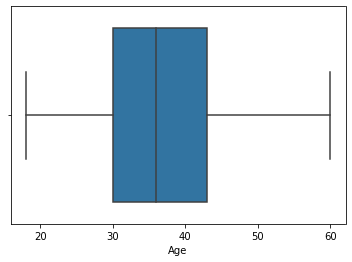

In [287]:
Age_1=sns.boxplot(HR_Analytics["Age"])
#The minimum value is 15. The median value is 35 and the maximum value is 60. 
#No outliers are present

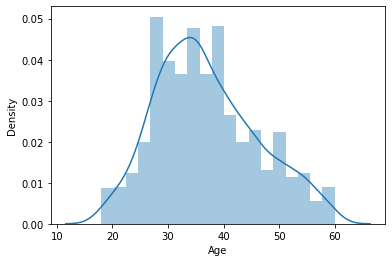

In [288]:
Age_2=sns.distplot(HR_Analytics["Age"])
#The density of age lies between 25 to 40
#It seems like  normal distribution 

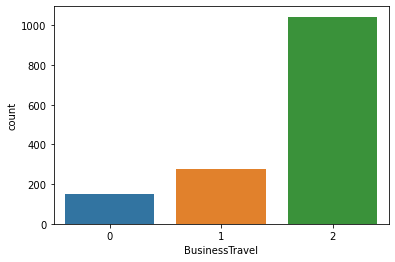

In [289]:
Business_Travel=sns.countplot(HR_Analytics["BusinessTravel"])
#Employees who travel rarely are the most and the ones who do not travel are the least.

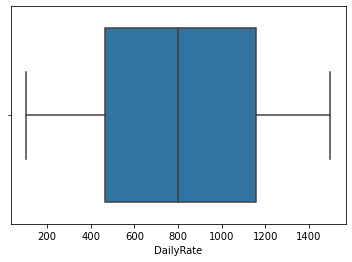

In [290]:
DailyRate_1=sns.boxplot(HR_Analytics["DailyRate"])
#The minimum value is 150. The median value is 800 and the maximum value is 1500. 
#No outliers are present

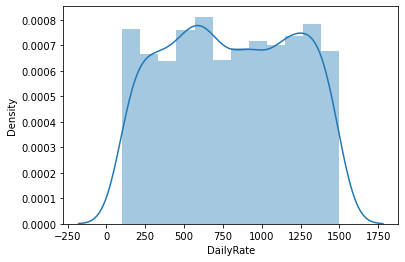

In [291]:
DailyRate_2=sns.distplot(HR_Analytics["DailyRate"])
#The density of age lies between 125 to 1500
#It seems like  normal distribution since no skewness is present

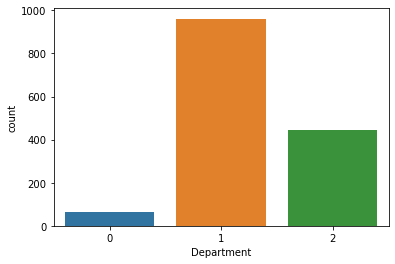

In [292]:
Department=sns.countplot(HR_Analytics["Department"])
#Employees in the research and development department are the most and in human resources are the least.

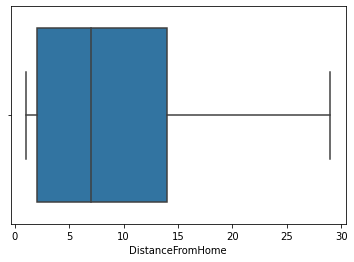

In [293]:
DistanceFromHome_1=sns.boxplot(HR_Analytics["DistanceFromHome"])
#The minimum value is 2. The median value is 7 and the maximum value is 28. 
#No outliers are present

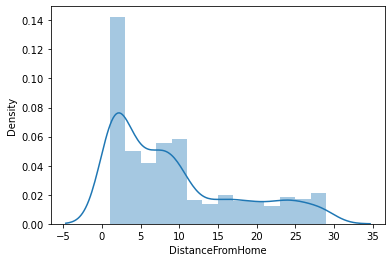

In [294]:
DistanceFromHome_2=sns.distplot(HR_Analytics["DistanceFromHome"])
#The density of age lies between 2 to 5
#It is right skewed.

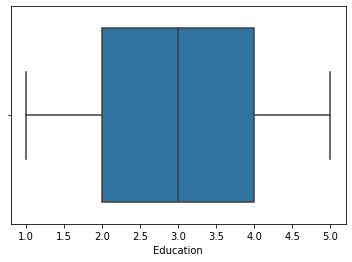

In [295]:
Education_1=sns.boxplot(HR_Analytics["Education"])
#The minimum value is 1. The median value is 3 and the maximum value is 5. 
#No outliers are present

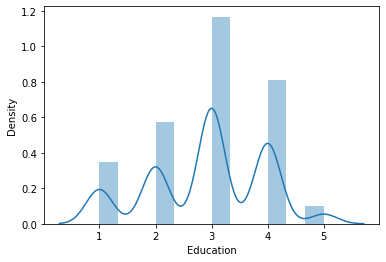

In [296]:
Education_2=sns.distplot(HR_Analytics["Education"])
#There is no skewness present.Its hard to draw any conclusion based on this plot

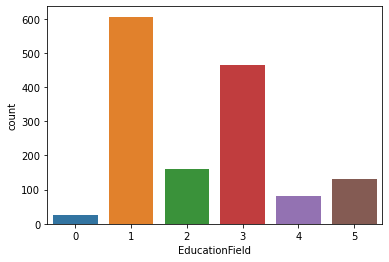

In [297]:
Education_Field=sns.countplot(HR_Analytics["EducationField"])
#Employees in the field of Life Scienecs are the most and in human resources are the least.

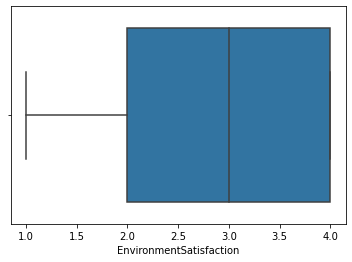

In [298]:
Environmentsatisfaction_1=sns.boxplot(HR_Analytics["EnvironmentSatisfaction"])
#The minimum value is 1. The median value is 3 and the maximum value is same as the 75th percentile i.e. 4. 
#No outliers are present

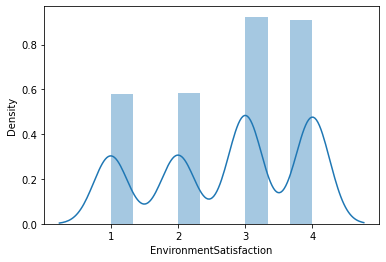

In [299]:
Environmentsatisfaction_2=sns.distplot(HR_Analytics["EnvironmentSatisfaction"])
#There is no skewness present.Its hard to draw any conclusion based on this plot

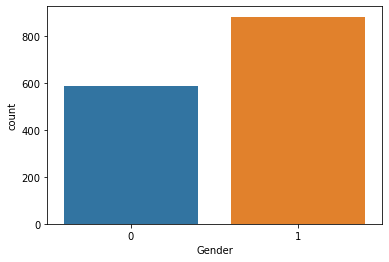

In [300]:
Gender=sns.countplot(HR_Analytics["Gender"])
#Employees who are males are more than females.

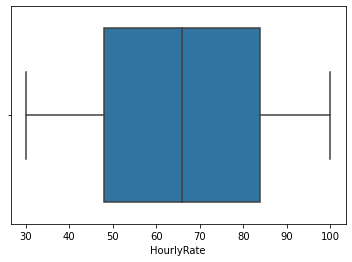

In [301]:
HourlyRate_1=sns.boxplot(HR_Analytics["HourlyRate"])
#The minimum value is 30. The median value is 65 and the maximum value is 100. 
#No outliers are present

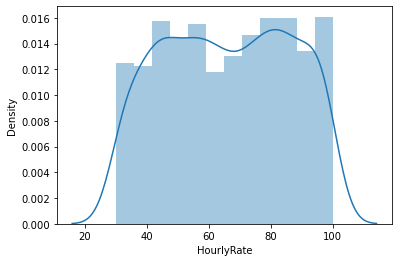

In [302]:
HourlyRate_2=sns.distplot(HR_Analytics["HourlyRate"])
#The density of hourly rate lies between 30 to 100
#No skewness is present

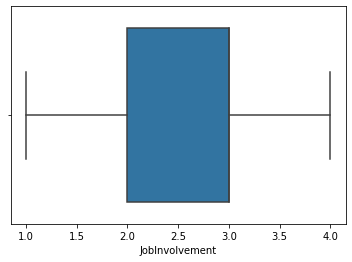

In [303]:
JobInvolvement_1=sns.boxplot(HR_Analytics["JobInvolvement"])
#The minimum value is 1. There is no median value and the maximum value is 4. 
#No outliers are present

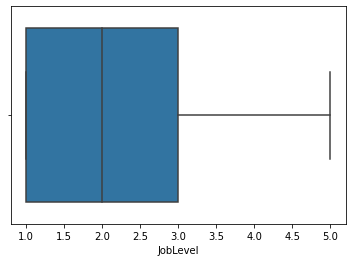

In [304]:
JobLevel_1=sns.boxplot(HR_Analytics["JobLevel"])
#The minimum value is 1 which is same as the 25th percentile value. The median value is 2 and the maximum value is 5. 
#No outliers are present

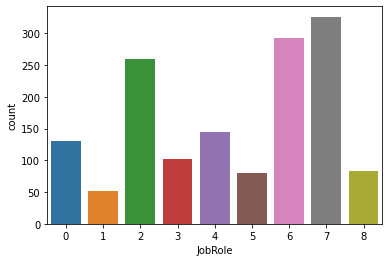

In [305]:
JobRole=sns.countplot(HR_Analytics["JobRole"])
#Employees in the job role of sales representative are the most while in the Human resources are the least

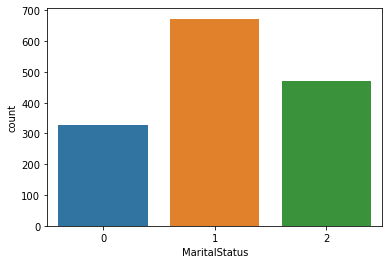

In [306]:
MaritalStatus=sns.countplot(HR_Analytics["MaritalStatus"])
#Employees who are married are the most and divorced are the least

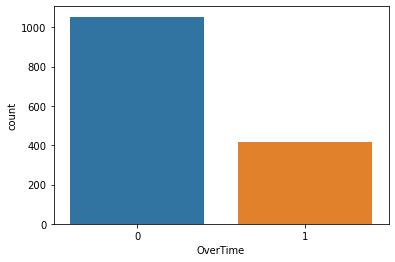

In [307]:
OverTime=sns.countplot(HR_Analytics["OverTime"])
# Most employees are not working overtime 

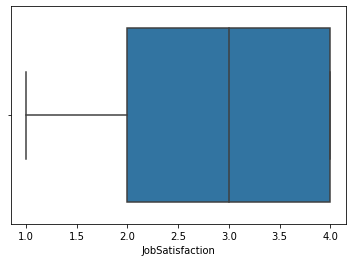

In [308]:
JobSatisfaction_1=sns.boxplot(HR_Analytics["JobSatisfaction"])
#The minimum value is 1 . The median value is 3 and the maximum value is 4 which is same as the 75th percentile. 
#No outliers are present

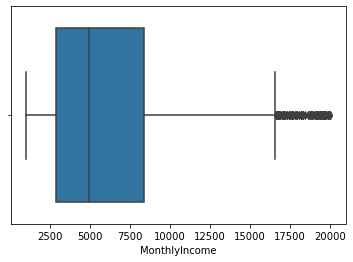

In [309]:
MonthlyIncome_1=sns.boxplot(HR_Analytics["MonthlyIncome"])
#The minimum value is 2400 . The median value is 5000 and the maximum value is 20000.
#There are some outliers present which will be treated later using zscore.

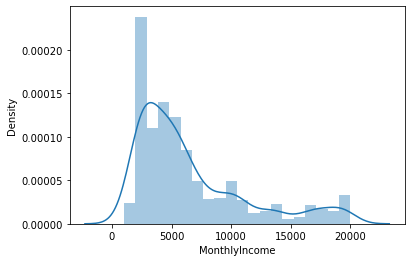

In [310]:
MonthlyIncome_2=sns.distplot(HR_Analytics["MonthlyIncome"])
#Maximum density of monthly income lies between 1000 to 5000.
#It is right skewed.

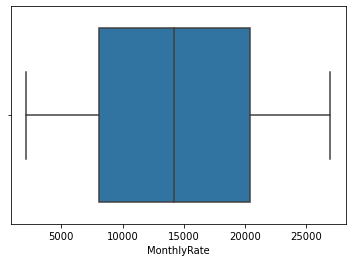

In [311]:
MonthlyRate_1=sns.boxplot(HR_Analytics["MonthlyRate"])
#The minimum value is 4000 . The median value is 14000 and the maximum value is 21000.
#No outliers are present.

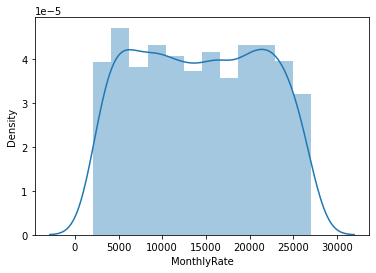

In [312]:
MonthlyRate_2=sns.distplot(HR_Analytics["MonthlyRate"])
#Maximum density of monthly income lies between 2500 to 27000.
#Skewness is absent.It seems normally distributed

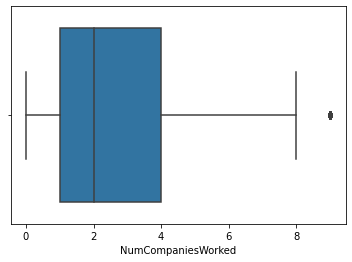

In [313]:
NumCompaniesWorked_1=sns.boxplot(HR_Analytics["NumCompaniesWorked"])
#The minimum value is 0 . The median value is 2 and the maximum value is 9.
#Only one outlier is present.

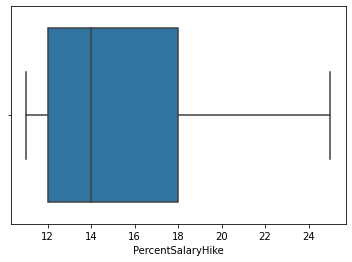

In [314]:
PercentSalaryHike_1=sns.boxplot(HR_Analytics["PercentSalaryHike"])
#The minimum value is 10 . The median value is 14 and the maximum value is 26.
#No outliers are present.

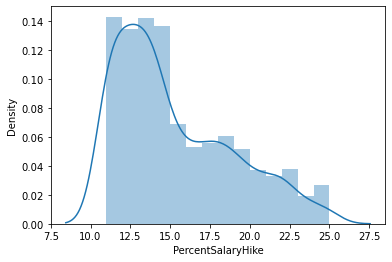

In [315]:
PercentSalaryHike_2=sns.distplot(HR_Analytics["PercentSalaryHike"])
#Maximum density of monthly income lies between 11 to 14.
#it is right skewed

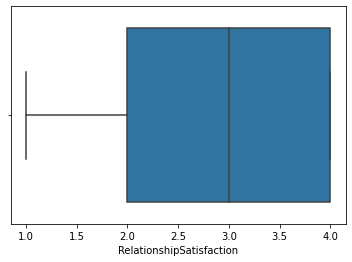

In [316]:
RelationshipSatisfaction_1=sns.boxplot(HR_Analytics["RelationshipSatisfaction"])
#The minimum value is 1 . The median value is 3 and the maximum value is which is same as the 75th percentile is 4.
#No outliers are present.

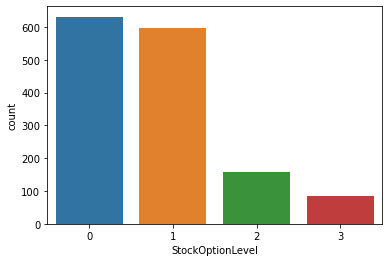

In [317]:
StockOptionLevel=sns.countplot(HR_Analytics["StockOptionLevel"])
# Most employees are not in stock option level the least employees are the most stockoption level

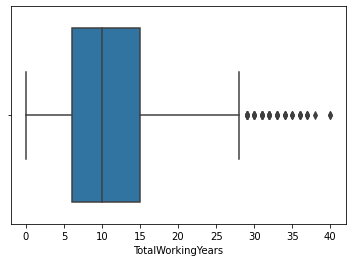

In [318]:
TotalWorkingYears_1=sns.boxplot(HR_Analytics["TotalWorkingYears"])
#The minimum value is 0 . The median value is 10 and the maximum value is 40.
#Some outliers are present.

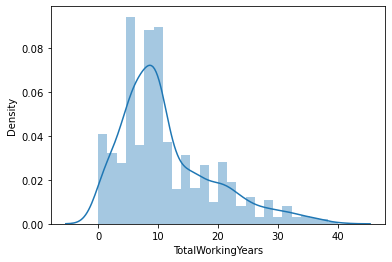

In [319]:
TotalWorkingYears_2=sns.distplot(HR_Analytics["TotalWorkingYears"])
#Maximum density of monthly income lies between 5 to 10.
#it is right skewed

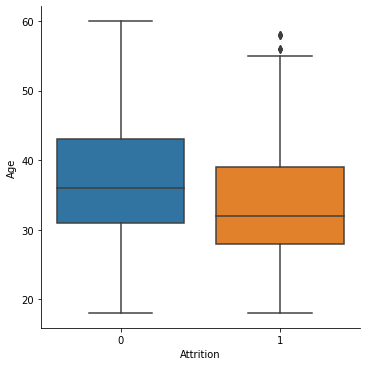

In [320]:
sns.catplot(x="Attrition",y="Age",kind="box",data=HR_Analytics)
#the median age of attrition is lower in older employees. As the age increasses, the employees tend to stick around in the company for a longer time.

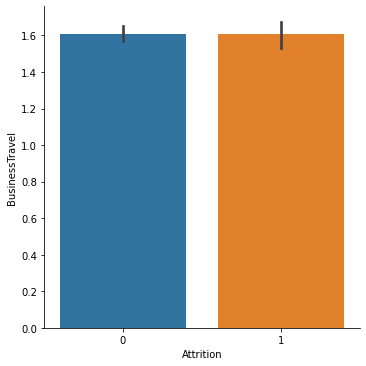

In [321]:
sns.catplot(x="Attrition",y="BusinessTravel",kind="bar",data=HR_Analytics)
#there is not much impact of travel on attrition.

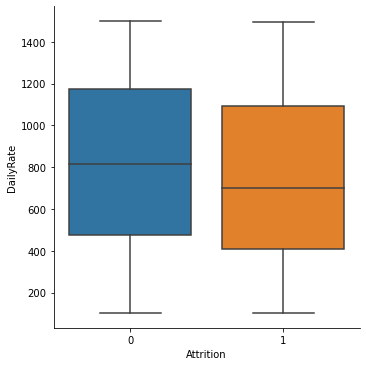

In [322]:
sns.catplot(x="Attrition",y="DailyRate",kind="box",data=HR_Analytics)
#attrition rate is lower in employees with higher daily rate

In [323]:
#Now lets find outliers

In [324]:
zscore(HR_Analytics)

array([[ 0.4463504 ,  2.28090588,  0.59004834, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.4384223 , -0.91319439, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  2.28090588,  0.59004834, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -0.4384223 ,  0.59004834, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.4384223 , -0.91319439, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.4384223 ,  0.59004834, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [325]:
z=np.abs(zscore(HR_Analytics))

In [326]:
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([31, 30, 28, 30, 29, 30, 25, 25, 28, 30, 29, 30, 31, 25, 28, 30, 31,
       30, 25, 31, 28, 29, 30, 29, 31, 28, 30, 25, 28, 29, 30, 30, 31, 25,
       28, 28, 30, 30, 25, 29, 28, 28, 30, 28, 31, 30, 28, 25, 28, 30, 31,
       25, 31, 28, 30, 

In [327]:
HR_Analytics_New=HR_Analytics[(z<3).all(axis=1)]
HR_Analytics_New
#SInce data loss is around 5%, we can go ahead with the new dataset i.e. after the removal of outliers

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [328]:
HR_Analytics_New.shape

(1387, 32)

In [329]:
#Now lets check for the skewness and remove them where value is greater than 0.5

In [330]:
HR_Analytics_New.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
W

In [331]:
HR_Analytics_New["DistanceFromHome"]=power_transform(HR_Analytics_New["DistanceFromHome"].values.reshape(-1,1))

In [332]:
HR_Analytics_New["JobLevel"]=power_transform(HR_Analytics_New["JobLevel"].values.reshape(-1,1))

In [333]:
HR_Analytics_New["MonthlyIncome"]=power_transform(HR_Analytics_New["MonthlyIncome"].values.reshape(-1,1))

In [334]:
HR_Analytics_New["NumCompaniesWorked"]=power_transform(HR_Analytics_New["NumCompaniesWorked"].values.reshape(-1,1))

In [335]:
HR_Analytics_New["PercentSalaryHike"]=power_transform(HR_Analytics_New["PercentSalaryHike"].values.reshape(-1,1))

In [336]:
HR_Analytics_New["PerformanceRating"]=power_transform(HR_Analytics_New["PerformanceRating"].values.reshape(-1,1))

In [337]:
HR_Analytics_New["StockOptionLevel"]=power_transform(HR_Analytics_New["StockOptionLevel"].values.reshape(-1,1))

In [338]:
HR_Analytics_New["TotalWorkingYears"]=power_transform(HR_Analytics_New["TotalWorkingYears"].values.reshape(-1,1))

In [339]:
HR_Analytics_New["TrainingTimesLastYear"]=power_transform(HR_Analytics_New["TrainingTimesLastYear"].values.reshape(-1,1))

In [340]:
HR_Analytics_New["WorkLifeBalance"]=power_transform(HR_Analytics_New["WorkLifeBalance"].values.reshape(-1,1))

In [341]:
HR_Analytics_New["YearsAtCompany"]=power_transform(HR_Analytics_New["YearsAtCompany"].values.reshape(-1,1))

In [342]:
HR_Analytics_New["YearsInCurrentRole"]=power_transform(HR_Analytics_New["YearsInCurrentRole"].values.reshape(-1,1))

In [343]:
HR_Analytics_New["YearsSinceLastPromotion"]=power_transform(HR_Analytics_New["YearsSinceLastPromotion"].values.reshape(-1,1))

In [344]:
HR_Analytics_New["YearsWithCurrManager"]=power_transform(HR_Analytics_New["YearsWithCurrManager"].values.reshape(-1,1))

In [345]:
#Lets check skewness again after removing skewness through power transform
HR_Analytics_New.skew()
#It looks in range now

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.008149
Education                  -0.289024
EducationField              0.544868
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
W

In [346]:
#now lets separate x and y before starting machine learning

In [347]:
x=HR_Analytics_New.drop("Attrition",axis=1)
x.shape

(1387, 31)

In [348]:
y=HR_Analytics_New["Attrition"]
y.shape

(1387,)

In [350]:
#lets apply standard scaler to x variables

In [351]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[ 0.5366811 ,  0.59312579,  0.73432467, ...,  0.29052433,
        -1.07353381,  0.58217664],
       [ 1.44211114, -0.90535412, -1.30776866, ...,  1.0065754 ,
         0.19316755,  1.01807316],
       [ 0.08396607,  0.59312579,  1.40675151, ..., -1.57181404,
        -1.07353381, -1.52842596],
       ...,
       [-1.04782149,  0.59312579, -1.61544736, ..., -0.39076907,
        -1.07353381,  0.01867962],
       [ 1.44211114, -0.90535412,  0.53830356, ...,  0.79376377,
        -1.07353381,  1.20578193],
       [-0.2555702 ,  0.59312579, -0.44180199, ..., -0.01873824,
         0.19316755, -0.3478709 ]])

In [362]:
#lets train_test_split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(970, 31)
(417, 31)
(970,)
(417,)


#Now lets use four ML algos to select the best fit model:
1)Logistic Regression
2)KNN
3)Randomforest
4)Adaboost

In [367]:
#1) Logisticregression
lg=LogisticRegression()
lg.fit(x_train,y_train)
#lets predict y values
pred1=lg.predict(x_test)
print(accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))
score1=cross_val_score(lg,x,y,scoring="f1",cv=5)
print(score1)
print(score1.mean())
print(score1.std())

0.8633093525179856
[[333  12]
 [ 45  27]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       345
           1       0.69      0.38      0.49        72

    accuracy                           0.86       417
   macro avg       0.79      0.67      0.70       417
weighted avg       0.85      0.86      0.85       417

[0.54054054 0.45714286 0.46575342 0.52777778 0.57534247]
0.5133114131744267
0.0452000476204616


In [368]:
#KNN
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
#lets predict y values
pred2=knn.predict(x_test)
print(accuracy_score(pred2,y_test))
print(confusion_matrix(pred2,y_test))
print(classification_report(pred2,y_test))
score2=cross_val_score(knn,x,y,scoring="f1",cv=5)
print(score2)
print(score2.mean())
print(score2.std())

0.8513189448441247
[[343  60]
 [  2  12]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       403
           1       0.17      0.86      0.28        14

    accuracy                           0.85       417
   macro avg       0.58      0.85      0.60       417
weighted avg       0.97      0.85      0.90       417

[0.15384615 0.21052632 0.3        0.31578947 0.19230769]
0.23449392712550607
0.06286207061478906


In [369]:
#Randomforest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
#lets predict y values
pred3=rf.predict(x_test)
print(accuracy_score(pred3,y_test))
print(confusion_matrix(pred3,y_test))
print(classification_report(pred3,y_test))
score3=cross_val_score(rf,x,y,scoring="f1",cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.841726618705036
[[341  62]
 [  4  10]]
              precision    recall  f1-score   support

           0       0.99      0.85      0.91       403
           1       0.14      0.71      0.23        14

    accuracy                           0.84       417
   macro avg       0.56      0.78      0.57       417
weighted avg       0.96      0.84      0.89       417

[0.26415094 0.25925926 0.30508475 0.29090909 0.22641509]
0.26916382673338224
0.027253816303254394


In [370]:
#Adaboost
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
#lets predict y values
pred4=ad.predict(x_test)
print(accuracy_score(pred4,y_test))
print(confusion_matrix(pred4,y_test))
print(classification_report(pred4,y_test))
score4=cross_val_score(ad,x,y,scoring="f1",cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.8561151079136691
[[327  42]
 [ 18  30]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       369
           1       0.42      0.62      0.50        48

    accuracy                           0.86       417
   macro avg       0.68      0.76      0.71       417
weighted avg       0.89      0.86      0.87       417

[0.         0.47887324 0.45783133 0.51851852 0.16326531]
0.32369767787575837
0.20520486485202277


In [371]:
#on comparing the f1-score accuracy with cross_val f1 score, the difference is the least in terms of logistic regression. 
#Hence Logisctic regression is the best fit model

In [374]:
#Lets hypertune using randomizedsearchcv
parameters={"penalty":["none","l2","l1","elasticnet"],"dual":[True,False],"C":[1,10,0.5,20],"random_state":[42,50,30,45],"solver":["newton-cg","lbfgs","liblinear","sag"]}
rsearch=RandomizedSearchCV(lg,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [1, 10, 0.5, 20],
                                        'dual': [True, False],
                                        'penalty': ['none', 'l2', 'l1',
                                                    'elasticnet'],
                                        'random_state': [42, 50, 30, 45],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag']})

In [375]:
print(rsearch.best_estimator_)
print(rsearch.best_params_)
print(rsearch.best_score_)

LogisticRegression(C=0.5, random_state=50, solver='liblinear')
{'solver': 'liblinear', 'random_state': 50, 'penalty': 'l2', 'dual': False, 'C': 0.5}
0.8773195876288661


In [379]:
#lets put these parameters back to the best fit model to imporove the accuracy
lg1=LogisticRegression(C=0.5,solver="liblinear",random_state=50,penalty="l2",dual=False)
lg1.fit(x_train,y_train)
#lets predict y_values
pred5=lg1.predict(x_test)
print(accuracy_score(y_test,pred5))
print(confusion_matrix(y_test,pred5))
print(classification_report(y_test,pred5))

0.8633093525179856
[[333  12]
 [ 45  27]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       345
           1       0.69      0.38      0.49        72

    accuracy                           0.86       417
   macro avg       0.79      0.67      0.70       417
weighted avg       0.85      0.86      0.85       417



In [381]:
y_pred_prob=lg1.predict_proba(x_test)[:,1]
y_pred_prob

array([8.47936432e-01, 4.35393593e-03, 1.67685821e-01, 8.39382022e-01,
       5.40005846e-02, 1.66715036e-01, 6.86938324e-01, 2.00471276e-02,
       2.30027295e-02, 1.01488435e-02, 6.01015227e-02, 1.33747415e-02,
       6.51207660e-01, 1.62771991e-01, 2.67116361e-02, 2.58692110e-01,
       9.30304686e-01, 5.73837420e-02, 4.40309096e-01, 1.72109344e-01,
       1.26942462e-01, 1.09574031e-01, 1.04818683e-01, 1.46289188e-02,
       2.76793426e-01, 1.27516099e-01, 2.87682497e-02, 5.46464791e-01,
       2.86924321e-01, 2.67219730e-02, 1.32699404e-01, 1.96108990e-01,
       3.05840132e-01, 2.81267616e-01, 9.76719038e-02, 2.78212093e-02,
       3.81749214e-01, 5.13929497e-02, 5.23413578e-02, 9.95281451e-02,
       9.07332483e-01, 7.71930367e-02, 7.40714403e-01, 2.23645170e-01,
       1.38755377e-02, 5.67851211e-02, 4.91993212e-01, 1.11261191e-01,
       5.51547044e-01, 3.25942094e-02, 6.48205628e-02, 1.21978397e-02,
       1.91731677e-01, 1.09256771e-01, 1.40033505e-02, 3.90916559e-01,
      

In [382]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.00289855 0.00289855 0.00869565
 0.00869565 0.0115942  0.0115942  0.0173913  0.0173913  0.02028986
 0.02028986 0.02898551 0.02898551 0.03188406 0.03188406 0.04637681
 0.04637681 0.04927536 0.04927536 0.05797101 0.05797101 0.06086957
 0.06086957 0.06956522 0.06956522 0.07826087 0.07826087 0.09565217
 0.09565217 0.10144928 0.10144928 0.10434783 0.10434783 0.10724638
 0.10724638 0.11304348 0.11304348 0.11594203 0.11594203 0.12173913
 0.12173913 0.13333333 0.13333333 0.15072464 0.15072464 0.17391304
 0.17391304 0.1826087  0.1826087  0.18550725 0.18550725 0.2057971
 0.2057971  0.29565217 0.29565217 0.30724638 0.30724638 0.33913043
 0.33913043 0.34782609 0.34782609 0.35942029 0.35942029 0.51884058
 0.51884058 0.53043478 0.53043478 0.64637681 0.64637681 0.66666667
 0.66666667 0.68695652 0.68695652 0.75362319 0.75362319 0.85797101
 0.85797101 0.88115942 0.88115942 0.90144928 0.90144928 0.90434783
 0.90434783 0.92463768 0.92463768 1.        ]
[0.         0.013

Text(0.5, 1.0, 'Logistic Regression')

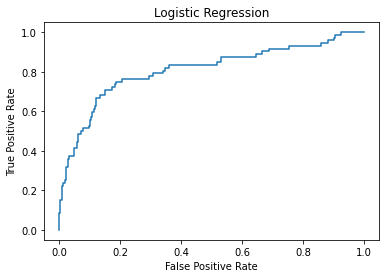

In [383]:
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")

In [385]:
#lets perform serialization to dump the model for further use
joblib.dump(lg1,"lg1.obj")

['lg1.obj']